<a href="https://colab.research.google.com/github/fatazeouedraogo/Deep-Learning-for-Healthcare-Brain-Tumor-Classification-using-VGG16/blob/main/Fake_banknote_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fake banknote detection system using the UCI dataset**

# Dataset download

In [1]:
import pandas as pd

# Chargement direct depuis l'UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
data = pd.read_csv(url, header=None, names=["variance", "skewness", "kurtosis", "entropy", "class"])

In [2]:
# Aperçu des données
print(data.head())

# Statistiques descriptives
print(data.describe())

# Distribution des classes (0=vrai, 1=faux)
print(data["class"].value_counts())

   variance  skewness  kurtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
          variance     skewness     kurtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
class
0    762
1    610
Name: count, dtype: int64


# Data Processing

In [12]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data.drop("class", axis=1)
y = data["class"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

Epoch 1: Added 10 trees (Total: 10)
  Train Accuracy: 0.9991
  Test Accuracy: 0.9927
Epoch 2: Added 10 trees (Total: 20)
  Train Accuracy: 0.9991
  Test Accuracy: 0.9927
Epoch 3: Added 10 trees (Total: 30)
  Train Accuracy: 1.0000
  Test Accuracy: 0.9927
Epoch 4: Added 10 trees (Total: 40)
  Train Accuracy: 1.0000
  Test Accuracy: 0.9927
Epoch 5: Added 10 trees (Total: 50)
  Train Accuracy: 1.0000
  Test Accuracy: 0.9891
Epoch 6: Added 10 trees (Total: 60)
  Train Accuracy: 1.0000
  Test Accuracy: 0.9891
Epoch 7: Added 10 trees (Total: 70)
  Train Accuracy: 1.0000
  Test Accuracy: 0.9927
Epoch 8: Added 10 trees (Total: 80)
  Train Accuracy: 1.0000
  Test Accuracy: 0.9891
Epoch 9: Added 10 trees (Total: 90)
  Train Accuracy: 1.0000
  Test Accuracy: 0.9927
Epoch 10: Added 10 trees (Total: 100)
  Train Accuracy: 1.0000
  Test Accuracy: 0.9927

Final Confusion Matrix:
 [[148   0]
 [  2 125]]


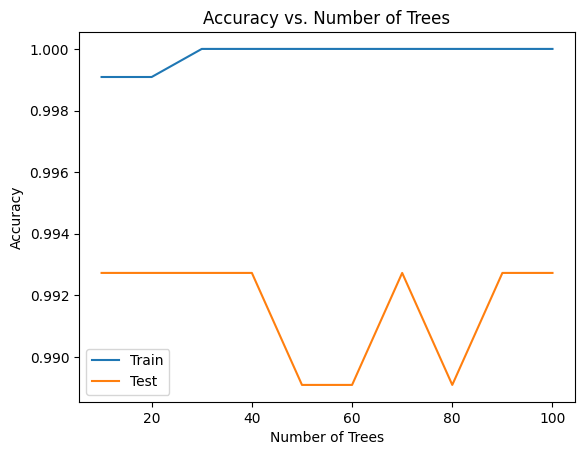

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Initialize model with warm_start to add trees incrementally
model = RandomForestClassifier(warm_start=True,
                             n_estimators=0,  # Start with 0 trees
                             random_state=42)

# Train in "epoch-like" increments
n_epochs = 10
trees_per_epoch = 10
train_acc = []
test_acc = []

for epoch in range(1, n_epochs + 1):
    # Add more trees
    model.n_estimators += trees_per_epoch
    model.fit(X_train, y_train)

    # Track accuracy
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

    print(f"Epoch {epoch}: Added {trees_per_epoch} trees (Total: {model.n_estimators})")
    print(f"  Train Accuracy: {train_acc[-1]:.4f}")
    print(f"  Test Accuracy: {test_acc[-1]:.4f}")

# Final evaluation
y_pred = model.predict(X_test)
print("\nFinal Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot accuracy progression
plt.plot(range(trees_per_epoch, (n_epochs+1)*trees_per_epoch, trees_per_epoch),
         train_acc, label='Train')
plt.plot(range(trees_per_epoch, (n_epochs+1)*trees_per_epoch, trees_per_epoch),
         test_acc, label='Test')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees')
plt.legend()
plt.show()